In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.naive_bayes import CategoricalNB,MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [2]:
data_train= pickle.load(open('train.p', 'rb'))
data_test= pickle.load(open('test.p', 'rb'))
data_train.shape,data_test.shape

((77938, 8), (13754, 8))

# Structural Information Model

In [3]:
data_train.head()

,email_id,parts,attachments,html,subject,body,links,spam
153669,208/016,0,0,0,b'RE: ',yes i know!\n\n -----Original Message-----\nFr...,1,0
122115,102/102,0,0,0,b'FW: Texas Monthly (November 2001): How Enron...,"FYI\n-----Original Message-----\nFrom: Lees, L...",1,0
152731,204/274,0,0,0,b'Schedule Crawler: HourAhead Failure',\n\nStart Date: 1/22/02; HourAhead hour: 7; H...,1,0
109808,061/037,0,0,0,b'RE: Security Access',"Security, Everyone on the attached list will r...",1,0
107975,054/257,3,0,1,b'critical SOftware warning - January 25th',"CNET Rep0rt \noffice X,P Pro 2002 . 6O D0lLars...",1,1


In [4]:
#transform ['parts','html','links','attachments'] from integer to binary
data_train1=data_train[['parts','html','links','attachments']]
data_train1[data_train1!=0]=1
data_train[['parts','html','links','attachments']]=data_train1
data_train

C:\Users\taoxijia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\taoxijia\Anaconda3\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,email_id,parts,attachments,html,subject,body,links,spam
153669,208/016,0,0,0,b'RE: ',yes i know!\n\n -----Original Message-----\nFr...,1,0
122115,102/102,0,0,0,b'FW: Texas Monthly (November 2001): How Enron...,"FYI\n-----Original Message-----\nFrom: Lees, L...",1,0
152731,204/274,0,0,0,b'Schedule Crawler: HourAhead Failure',\n\nStart Date: 1/22/02; HourAhead hour: 7; H...,1,0
109808,061/037,0,0,0,b'RE: Security Access',"Security, Everyone on the attached list will r...",1,0
107975,054/257,1,0,1,b'critical SOftware warning - January 25th',"CNET Rep0rt \noffice X,P Pro 2002 . 6O D0lLars...",1,1
...,...,...,...,...,...,...,...,...
97971,021/008,0,0,0,b'Top 10 popular pharmacy drugs',Online pharmacy - Visit our online store and s...,1,1
146592,184/117,0,0,0,b'FW: UI Termination',"\n-----Original Message-----\nFrom: Miller, D...",1,0
168526,257/192,1,0,1,b'Check these superb ddeals on quality rxmeds ...,\n\n\n\n\n\nSelect from a wide variety of bra...,1,1
92566,002/276,0,0,0,"b'EOL Data, July 9, 2001'",EOL Deals\t From: 7/1/2001 To: 7/6/2001\t \t...,1,0


In [5]:
#transform ['parts','html','links','attachments'] from integer to binary
data_test1=data_test[['parts','html','links','attachments']]
data_test1[data_test1!=0]=1
data_test[['parts','html','links','attachments']]=data_test1
data_test.head()

C:\Users\taoxijia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\taoxijia\Anaconda3\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,email_id,parts,attachments,html,subject,body,links,spam
147883,188/209,0,0,0,b'Updated: Integration Test Team Meeting',"When: Monday, January 07, 2002 1:00 PM-5:00 PM...",1,0
133606,140/251,0,0,0,b'FW: Rio Bravo Posting 11/19/01',"\n\n -----Original Message-----\nFrom: \t""Trou...",1,0
115772,081/035,0,0,0,b'=?GB2312?B?u7DO8bb6u/ogxfq3oszYvNs=?= 12:...,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,1
156994,219/045,0,0,0,b'Start Date: 2/2/02; HourAhead hour: 18; ',\n\nStart Date: 2/2/02; HourAhead hour: 18; N...,1,0
174329,277/008,0,0,0,=?unknown-8bit?b?z/Do4uXyISEgOikgICAg?=,"\nHi, Kim!!. \n24hrsbuy.com/?sbds...",1,1


In [16]:

clf= CategoricalNB()
clf_structure_grid = GridSearchCV(clf, param_grid={'alpha':[0,0.5,1,1.5,2]},scoring=['roc_auc','accuracy'],refit='roc_auc',cv=5)
clf_structure_grid.fit(data_train[['parts','html','links','attachments']],data_train['spam'])

C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxij

GridSearchCV(cv=5, error_score=nan,
             estimator=CategoricalNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.5, 1, 1.5, 2]}, pre_dispatch='2*n_jobs',
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=0)

In [17]:
clf_structure_best=clf_structure_grid.best_estimator_

In [18]:
"best model's alpha:",clf_structure_best.alpha

("best model's alpha:", 0)

In [19]:
"best model's AUC:",clf_structure_grid.best_score_

("best model's AUC:", 0.6776675352973598)

In [43]:
#result=clf_structure_grid.cv_results_
#result

In [44]:
#clf_structure_grid.best_index_

In [26]:
"best model's accuracy:",clf_structure_grid.cv_results_['mean_test_accuracy'][clf_structure_grid.best_index_]

("best model's accuracy:", 0.6350688592388277)

# Subject Model

In [27]:
with open('text_feature.p',"rb") as f:
    subject_train=pickle.load(f)
    subject_test=pickle.load(f)
    v_subject=pickle.load(f)
    body_train=pickle.load(f)
    body_test=pickle.load(f)
    v_body=pickle.load(f)

In [28]:
subject_train.shape,subject_test.shape,body_train.shape,body_test.shape

((77938, 39634), (13754, 39634), (77938, 408571), (13754, 408571))

In [36]:

def naivebayes(X,Y):
    clf= MultinomialNB()
    clf_structure_grid = GridSearchCV(clf, param_grid={'alpha':[0,0.5,1,1.5,2]},scoring=['roc_auc','accuracy'],refit='accuracy',cv=5)
    clf_structure_grid.fit(X,Y)
    clf_structure_best=clf_structure_grid.best_estimator_
    AUC=clf_structure_grid.best_score_
    acc=clf_structure_grid.cv_results_['mean_test_accuracy'][clf_structure_grid.best_index_]
    alpha=clf_structure_best.alpha
    print("the best AUC is:",AUC)
    print("the best accuracy is:", acc)
    print("the best para is:",alpha)
    return clf_structure_best,(AUC,acc),alpha


In [49]:
# def naivebayes_sparse(X,y,alpha,k=5):
#     skf = StratifiedKFold(n_splits=k)
#     max_auc=0
#     for i in alpha:
#         clf = CategoricalNB(alpha=i)
#         auc=0
#         for train_index, test_index in skf.split(X, y):
#             X_train, X_test = X[train_index], X[test_index]
#             y_train, y_test = y[train_index], y[test_index]
#             clf.fit(X_train, y_train)
#             y_predicted = clf.predict(X_test)
#             auc=auc+metrics.auc(y_test, y_predicted)
#         auc=auc/k
#         if auc>max_auc:
#             max_auc=auc
#             best_model=clf
#             best_alpha=i
#     return best_model,best_alpha,max_auc 
        
#         print metrics.confusion_matrix(y_test, y_predicted)
#         print metrics.classification_report(y_test, y_predicted)
#         print sum(-1 == y_test) / float(len(y_test))
#         print sum(y_predicted == y_test) / float(len(y_test))

In [37]:
clf_subject_best,clf_subject_best_score_,clf_subject_best_alpha=naivebayes(subject_train,data_train['spam'])

C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


the best AUC is: 0.921719825541043
the best accuracy is: 0.921719825541043
the best para is: 0


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Message Body Model

In [38]:
clf_body_best,clf_body_best_score_,clf_body_best_alpha=naivebayes(body_train,data_train['spam'])

C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


the best AUC is: 0.9320614207450234
the best accuracy is: 0.9320614207450234
the best para is: 0


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Combined Model

In [56]:
# from sklearn.ensemble import VotingClassifier


In [39]:
from scipy.sparse import csr_matrix,hstack

In [40]:
#hstack([A,B])
type(body_train)

scipy.sparse.csr.csr_matrix

In [41]:
full_X_train=hstack([body_train,subject_train,csr_matrix(data_train[['parts','html','links','attachments']].values)])

In [42]:
clf_full_best,clf_full_best_score_,clf_full_best_alpha=naivebayes(full_X_train,data_train['spam'])

C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


the best AUC is: 0.9779055309163155
the best accuracy is: 0.9779055309163155
the best para is: 0


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Testing

## Best Model

By comparing 4 models, namely Structural Information Model,Subject Model, Message Body Model and Combined Model with 5-flod cross validation AUC 0.678,0.982,0.985 and 0994 respectively. Combined Model is chosen as the best model, because of it highest AUC score.

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from matplotlib.cm import rainbow
import time

In [96]:

# global color_i
# color_i=0

In [115]:
def testing(X_train,X_test,name):
    global color_i
    clf_best= MultinomialNB(alpha=0)
    clf_best.fit(X_train,data_train['spam'])
    Y_test_pred=clf_best.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(data_test['spam'], Y_test_pred)
    AUC=metrics.auc(fpr, tpr)
    ACC=clf_best.score(X_test,data_test['spam'])
    set_ht=np.argmin((thresholds-0.5)**2)
    print("AUC:",AUC,'\n',"ACC",ACC)
    return (fpr,tpr,AUC,ACC,set_ht,name)   


In [142]:
def plot_roc(result):
    figure1=plt.figure()
    colors = rainbow(np.linspace(0,1,4))
    color_i=0
    for fpr,tpr,AUC,ACC,set_ht,name in result:
        plt.plot(fpr,tpr,label="{} with AUC:{}, Accuracy:{} ".format(name,round(AUC,3),round(ACC,3)),color=colors[color_i])
        plt.plot([fpr[set_ht]], [tpr[set_ht]], marker='D', markersize=5, color=colors[color_i])
        color_i=color_i+1
    plt.legend(loc="lower right")
    plt.savefig('{}.png'.format(time.time()))
    return figure1


In [46]:
full_X_test=hstack([body_test,subject_test,csr_matrix(data_test[['parts','html','links','attachments']].values)])

In [118]:
#retrain with all training data
result_testing=[]

In [119]:
result_testing.append(testing(full_X_train,full_X_test,"combined"))

AUC: 0.9954008752961894 
 ACC 0.9797149920023266


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


## Other Models

### Structural Information Model

In [120]:
result_testing.append(testing(data_train[['parts','html','links','attachments']],data_test[['parts','html','links','attachments']],'structure'))

AUC: 0.6771129037131031 
 ACC 0.6353060927730115


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Subject Model

In [123]:
result_testing.append(testing(subject_train,subject_test,'subject'))

AUC: 0.9837910618792972 
 ACC 0.9237312781736222


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Message Body Model

In [124]:
result_testing.append(testing(body_train,body_test,'message body'))

AUC: 0.9871373541712525 
 ACC 0.9363094372546168


C:\Users\taoxijia\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


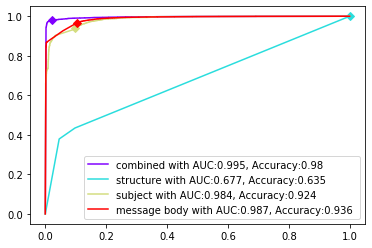

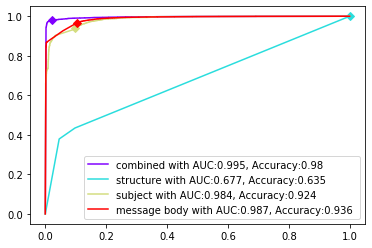

In [143]:
plot_roc(result_testing)

# Testing on TREC 2007

In [144]:
data_07=pickle.load(open('..\\trec07p\\data_new2_ready.p', 'rb'))

In [145]:
subject_07=v_subject.transform(data_07['subject'])
body_07=v_body.transform(data_07['body'])

In [146]:
full_X_07=hstack([body_07,subject_07,csr_matrix(data_07[['parts','html','links','attachments']].values)])

In [147]:
Y_test_pred=clf_best.predict_proba(full_X_07)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(data_07['spam'], Y_test_pred,drop_intermediate=False)
AUC=metrics.auc(fpr, tpr)
ACC=clf_best.score(full_X_07,data_07['spam'])

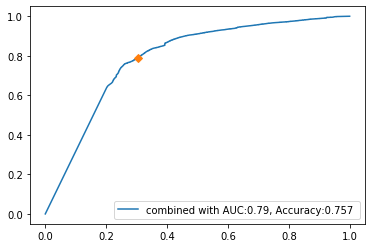

In [148]:
set_ht=np.argmin((thresholds-0.5)**2)
plt.plot(fpr,tpr,label="{} with AUC:{}, Accuracy:{} ".format("combined",round(AUC,3),round(ACC,3)))
plt.plot([fpr[set_ht]], [tpr[set_ht]], marker='D', markersize=5)
plt.legend(loc="lower right")
plt.savefig('{}.png'.format(time.time()))

## The reason of bad performance: small amout of common words in dataset 05 and 07

In [142]:
with open('..\\trec07p\\text_feature.p',"rb") as f:
    subject_train_07=pickle.load(f)
    subject_test_07=pickle.load(f)
    v_subject_07=pickle.load(f)
    body_train_07=pickle.load(f)
    body_test_07=pickle.load(f)
    v_body_07=pickle.load(f)

In [147]:
set_subject=set(v_subject.get_feature_names())
set_body=set(v_body.get_feature_names())


In [144]:
set_subject_07=set(v_subject_07.get_feature_names())
set_body_07=set(v_body_07.get_feature_names())

In [148]:
len(set_subject),len(set_body),len(set_subject_07),len(set_body_07)

(39634, 408571, 25701, 383595)

In [151]:
len(set_subject & set_subject_07)

7151

In [152]:
len(set_body & set_body_07)

72546

In [153]:
7151/25701

0.27823820084821604

In [154]:
72546/383595

0.1891213389121339